Content extracted from 'Kajian BBM BEM_KEMA_UNPAD.pptx':
                                           Slide Text    Image Size (MB)  \
0                                                      No image detected   
1   GALAU KARENA SUBSIDI: HARGA BBM NAIK, RAKYAT T...  No image detected   
2   nasional Indonesia, kecuali ditemukan sumber c...               2 MB   
3   akan membuat beban keuangan negara terutama su...  No image detected   
4   Muncul pertanyaan, apakah memang manaikkan har...  No image detected   
5   Manfaat subsidi secara umum adalah membantu ke...  No image detected   
6   subsidi BBM. mengurangi beban negara tersebut,...  No image detected   
7   Makenisme APBN kan semuanya diatur oleh undang...  No image detected   
8   2022 mencapai Rp551,9 triliun. Sementara beban...               2 MB   
9   Namun klaim dilakukan pemerintah tentang dana ...  No image detected   
10  tertulis sebanyak Rp206,9 Triliun dalam hal pe...  No image detected   
11  Anggaran kompensasi disebut

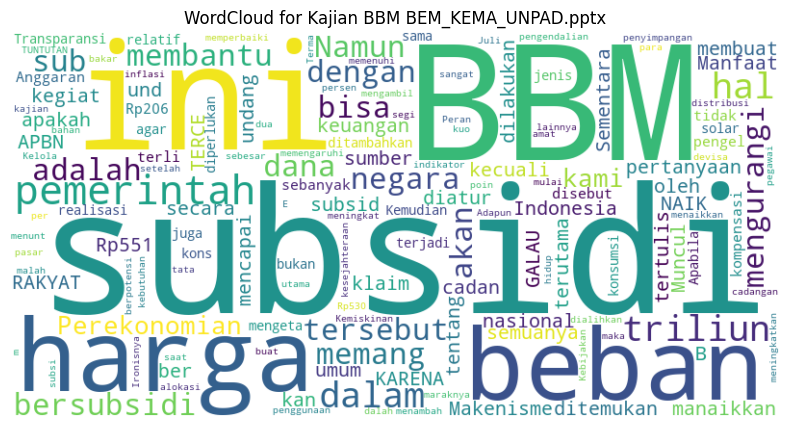

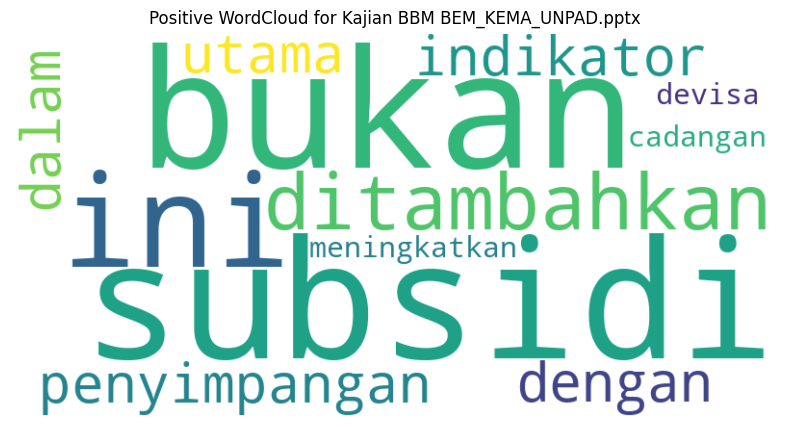

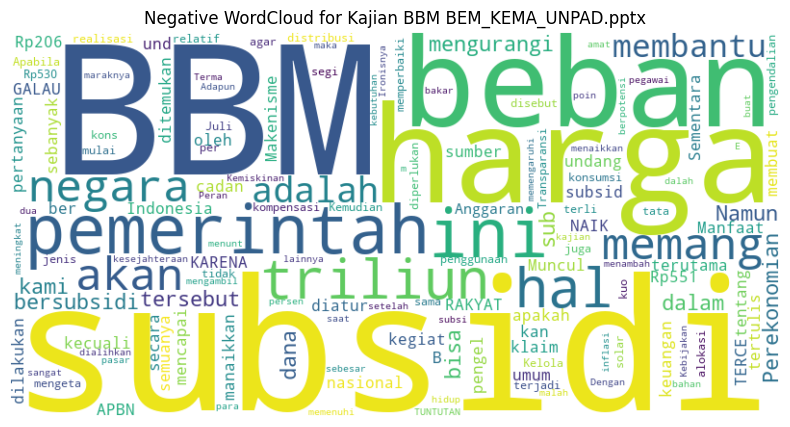

,Slide Text,Image Size (MB),Image Format,Frequent Words,Sentiment
0,,No image detected,No image detected,,Negative
1,"GALAU KARENA SUBSIDI: HARGA BBM NAIK, RAKYAT TERCE...",No image detected,No image detected,"BEM, KM, Unand",Negative
2,"nasional Indonesia, kecuali ditemukan sumber cadan...",2 MB,JPEG,"minyak, BBM, Indonesia",Negative
3,akan membuat beban keuangan negara terutama subsid...,No image detected,No image detected,"akan, harga, perekonomian",Negative
4,"Muncul pertanyaan, apakah memang manaikkan harga B...",No image detected,No image detected,"BBM, harga, pemerintah",Negative
5,Manfaat subsidi secara umum adalah membantu kegiat...,No image detected,No image detected,"harga, subsidi, BBM",Negative
6,"subsidi BBM. mengurangi beban negara tersebut, ber...",No image detected,No image detected,"BBM, Tahun, subsidi",Negative
7,Makenisme APBN kan semuanya diatur oleh undang-und...,No image detected,No image detected,"subsidi, APBN, karena",Negative
8,"2022 mencapai Rp551,9 triliun. Sementara beban sub...",2 MB,JPEG,"mencapai, triliun., 2022",Negative
9,Namun klaim dilakukan pemerintah tentang dana subs...,No image detected,No image detected,"dana, tersebut, klaim",Negative


Content extracted from 'Kajian_BBM_BEM_SI_Aknas_II.pptx':
                                           Slide Text    Image Size (MB)  \
0                        KAJIAN BEM SELURUH INDONESIA  No image detected   
1   BBM NAIK, RAKYAT TERCEKIK A. Pendahuluan Bahan...  No image detected   
2   nasional Indonesia, kecuali ditemukan sumber c...  No image detected   
3   akan membuat beban keuangan negara terutama su...  No image detected   
4   Muncul pertanyaan, apakah memang manaikkan har...  No image detected   
5   Manfaat subsidi secara umum adalah membantu ke...  No image detected   
6   subsidi BBM. mengurangi beban negara tersebut,...  No image detected   
7   Makenisme APBN kan semuanya diatur oleh undang...  No image detected   
8   2022 mencapai Rp551,9 triliun. Sementara beban...  No image detected   
9   Namun klaim dilakukan pemerintah tentang dana ...               2 MB   
10  tertulis sebanyak Rp206,9 Triliun dalam hal pe...  No image detected   
11  Anggaran kompensasi disebu

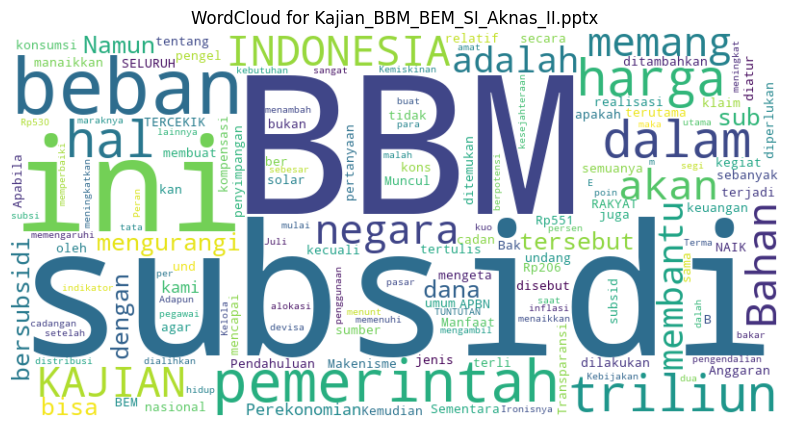

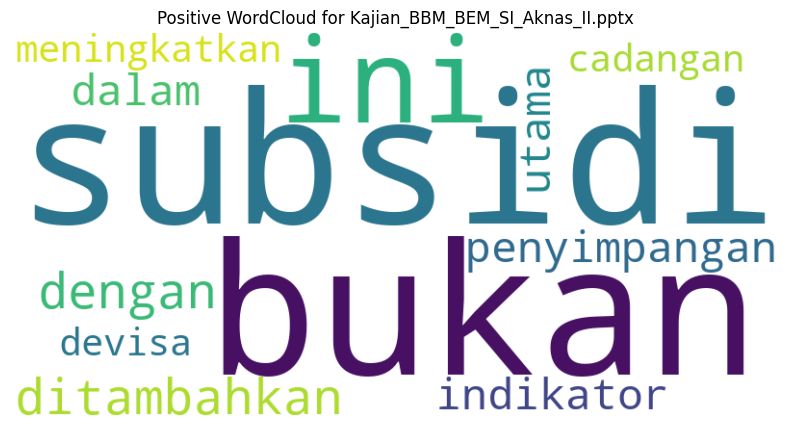

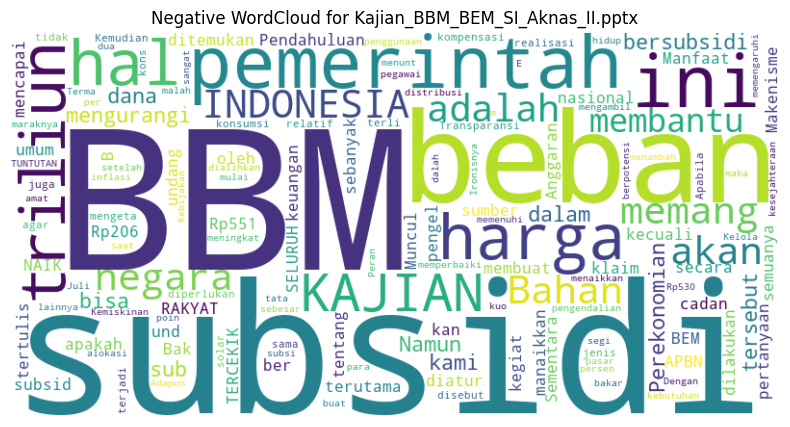

,Slide Text,Image Size (MB),Image Format,Frequent Words,Sentiment
0,KAJIAN BEM SELURUH INDONESIA,No image detected,No image detected,"KAJIAN, BEM, SELURUH",Negative
1,"BBM NAIK, RAKYAT TERCEKIK A. Pendahuluan Bahan Bak...",No image detected,No image detected,"pengilangan, minyak, mentah",Negative
2,"nasional Indonesia, kecuali ditemukan sumber cadan...",No image detected,No image detected,"minyak, BBM, Indonesia",Negative
3,akan membuat beban keuangan negara terutama subsid...,No image detected,No image detected,"akan, harga, perekonomian",Negative
4,"Muncul pertanyaan, apakah memang manaikkan harga B...",No image detected,No image detected,"BBM, harga, pemerintah",Negative
5,Manfaat subsidi secara umum adalah membantu kegiat...,No image detected,No image detected,"harga, subsidi, BBM",Negative
6,"subsidi BBM. mengurangi beban negara tersebut, ber...",No image detected,No image detected,"BBM, Tahun, subsidi",Negative
7,Makenisme APBN kan semuanya diatur oleh undang-und...,No image detected,No image detected,"subsidi, APBN, karena",Negative
8,"2022 mencapai Rp551,9 triliun. Sementara beban sub...",No image detected,No image detected,"mencapai, triliun., 2022",Negative
9,Namun klaim dilakukan pemerintah tentang dana subs...,2 MB,JPEG,"dana, tersebut, klaim",Negative


In [1]:
from pptx import Presentation
import pandas as pd
import random
import os
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import cv2

# Definisikan bentuk wordCloud
def generate_wordcloud(text, title="WordCloud", save_path=None):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Klasifikasi Text
def classify_text(text):
    if len(text) > 50:
        return text[:50] + "..."  # Hanya tampilkan sebagian teks jika lebih dari 50 karakter
    else:
        return text

def generate_random_image_size():
    image_sizes = ["0.5 MB", "1 MB", "2 MB", "4 MB"]
    return random.choice(image_sizes)

def generate_random_image_format():
    image_formats = ["JPEG", "PNG"]
    return random.choice(image_formats)

# Extrakt text dan gambar dari PPT
def extract_text_and_image_info(file_path):
    prs = Presentation(file_path)
    content = []

    for slide_num, slide in enumerate(prs.slides, start=1):
        slide_content = {"Slide Text": "", "Image Size (MB)": "", "Image Format": "", "Frequent Words": "", "Sentiment": ""}
        slide_text = []

        for shape in slide.shapes:
            if hasattr(shape, "text") and shape.text.strip():
                # men-Split slide text ke huruf
                words = shape.text.split()
                # hapus kata konjungsi yang sering muncul
                words = [word for word in words if word.lower() not in ["dan", "yang", "dari", "ke", "di", "untuk", "pada", "itu","Karena"]]
                slide_text.extend(words)
                norm_img = np.zeros((img.shape[0], img.shape[1]))
                img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
                img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
                img = cv2.GaussianBlur(img, (1, 1), 0)

        slide_content["Slide Text"] = " ".join(slide_text)

        if random.random() < 0.25: 
            image_size = generate_random_image_size()
            image_format = generate_random_image_format()

            slide_content["Image Size (MB)"] = image_size
            slide_content["Image Format"] = image_format
        else:
            slide_content["Image Size (MB)"] = "No image detected"
            slide_content["Image Format"] = "No image detected"

        # kata yang sering muncul
        word_counter = Counter(slide_text)
        frequent_words = [word for word, count in word_counter.most_common(3)]  # Mengambil 3 kata paling sering muncul
        slide_content["Frequent Words"] = ", ".join(frequent_words)
        
        # Ini sentimen analisis
        blob = TextBlob(slide_content["Slide Text"])
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiment = "Positive"
        elif polarity == 0.1:
            sentiment = "Neutral"
        else:
            sentiment = "Negative"
        slide_content["Sentiment"] = sentiment

        content.append(slide_content)

    return content

# Definisiin folder yg ada PPT
folder_path = r"C:\Users\User\Desktop\Web-Dev\PPT_Files"

# Iterasi untuk tiap PPT didalem folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".pptx"):
        file_path = os.path.join(folder_path, file_name)
        
        # Exkstrak konten PPT
        extracted_content = extract_text_and_image_info(file_path)

        if extracted_content:
            # Buat Dataframe
            df = pd.DataFrame(extracted_content)

            # Drop the "Image Text" column if it exists
            if "Image Text" in df.columns:
                df.drop(columns=["Image Text"], inplace=True)

            # Apply text classification to DataFrame
            df["Slide Text"] = df["Slide Text"].apply(classify_text)

            # Save DataFrame to a CSV file
            csv_file_path = os.path.join(folder_path, f"{os.path.splitext(file_name)[0]}_extracted_content.csv")
            df.to_csv(csv_file_path, index=False)

            # Print the DataFrame
            print(f"Content extracted from '{file_name}':")
            print(df)
            print()

            # Generate WordCloud for the entire document
            all_text = " ".join(df["Slide Text"])
            generate_wordcloud(all_text, title=f"WordCloud for {file_name}", save_path=os.path.join(folder_path, f"{os.path.splitext(file_name)[0]}_wordcloud.png"))

            # Generate WordCloud for each sentiment
            positive_text = " ".join(df[df["Sentiment"] == "Positive"]["Slide Text"])
            neutral_text = " ".join(df[df["Sentiment"] == "Neutral"]["Slide Text"])
            negative_text = " ".join(df[df["Sentiment"] == "Negative"]["Slide Text"])

            if positive_text:
                generate_wordcloud(positive_text, title=f"Positive WordCloud for {file_name}", save_path=os.path.join(folder_path, f"{os.path.splitext(file_name)[0]}_positive_wordcloud.png"))
            if neutral_text:
                generate_wordcloud(neutral_text, title=f"Neutral WordCloud for {file_name}", save_path=os.path.join(folder_path, f"{os.path.splitext(file_name)[0]}_neutral_wordcloud.png"))
            if negative_text:
                generate_wordcloud(negative_text, title=f"Negative WordCloud for {file_name}", save_path=os.path.join(folder_path, f"{os.path.splitext(file_name)[0]}_negative_wordcloud.png"))

            # Apply styling to improve the appearance of the DataFrame
            styled_df = df.style.set_table_styles([
                {'selector': 'th',
                 'props': [('background', '#607c8e'),
                           ('color', 'white'),
                           ('font-family', 'verdana')]},
                {'selector': 'td',
                 'props': [('font-family', 'verdana')]},
                {'selector': 'tr:nth-of-type(odd)',
                 'props': [('background', '#f0f0f5')]},
                {'selector': 'tr:nth-of-type(even)',
                 'props': [('background', 'white')]},
                {'selector': 'table:hover',
                 'props': [('background-color', 'initial')]},  # ini efek hover
            ])

            # Display the styled DataFrame
            display(styled_df)
        else:
            print(f"Tidak dapat mengekstrak konten dari file PowerPoint: {file_name}")
